# What is Hierarchical Clustering?

Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a **dendrogram**.

Hierarchical clustering has a couple of key benefits:

There is no need to pre-specify the number of clusters. Instead, the dendrogram can be cut at the appropriate level to obtain the desired number of clusters.
Data is easily summarized/organized into a hierarchy using dendrograms. Dendrograms make it easy to examine and interpret clusters.

## Hierarchical clustering types

There are two main types of hierarchical clustering:

**Agglomerative:** Initially, each object is considered to be its own cluster. According to a particular procedure, the clusters are then merged step by step until a single cluster remains. At the end of the cluster merging process, a cluster containing all the elements will be formed.

**Divisive:** The Divisive method is the opposite of the Agglomerative method. Initially, all objects are considered in a single cluster. Then the division process is performed step by step until each object forms a different cluster. The cluster division or splitting procedure is carried out according to some principles that maximum distance between neighboring objects in the cluster.


Between Agglomerative and Divisive clustering, Agglomerative clustering is generally the preferred method. The below example will focus on Agglomerative clustering algorithms because they are the most popular and easiest to implement.

## Hierarchical clustering steps
Hierarchical clustering employs a measure of distance/similarity to create new clusters. Steps for Agglomerative clustering can be summarized as follows:

- Step 1: Compute the proximity matrix using a particular distance metric
- Step 2: Each data point is assigned to a cluster
- Step 3: Merge the clusters based on a metric for the similarity between clusters
- Step 4: Update the distance matrix
- Step 5: Repeat Step 3 and Step 4 until only a single cluster remains

## Computing a proximity matrix

The first step of the algorithm is to create a distance matrix. The values of the matrix are calculated by applying a distance function between each pair of objects. The Euclidean distance function is commonly used for this operation. The structure of the proximity matrix will be as follows for a data set with `n` elements. Here, 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>d</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>p</mi>
    <mi>i</mi>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>p</mi>
    <mi>j</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>
represent the distance values between 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>p</mi>
    <mi>i</mi>
  </msub>
</math> and 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>p</mi>
    <mi>j</mi>
  </msub>
</math>.

## Similarity between Clusters

The main question in hierarchical clustering is how to calculate the distance between clusters and update the proximity matrix. There are many different approaches used to answer that question. Each approach has its advantages and disadvantages. The choice will depend on whether there is noise in the data set, whether the shape of the clusters is circular or not, and the density of the data points.

A numerical example will help illustrate the methods and choices. We'll use a small sample data set containing just nine two-dimensional points.

![alt text](https://storage.googleapis.com/lds-media/images/Sample-data-plot.width-1200.jpg)

Suppose we have two clusters in the sample data set. There are different approaches to calculate the distance between the clusters.

![alt text](https://storage.googleapis.com/lds-media/images/Sample-data-two-clusters-plot.width-1200.jpg)

### Min (Single) Linkage

One way to measure the distance between clusters is to find the minimum distance between points in those clusters. That is, we can find the point in the first cluster nearest to a point in the other cluster and calculate the distance between those points. In Figure 2, the closest points are `p2` in one cluster and `p5`
in the other. The distance between those points, and hence the distance between clusters, is found as `d(p2, p5)=4`.

![alt text](https://storage.googleapis.com/lds-media/images/Sample-data-min-distance-single-linkage.width-1200.jpg)

The advantage of the Min method is that it can accurately handle non-elliptical shapes. The disadvantages are that it is sensitive to noise and outliers.

### Max (Complete) Linkage

Another way to measure the distance is to find the maximum distance between points in two clusters. We can find the points in each cluster that are furthest away from each other and calculate the distance between those points. In Figure 3, the maximum distance is between `p1` and `p6`. Distance between those two points, and hence the distance between clusters, is found as `d(p1, p6)=10`.

![alt text](https://storage.googleapis.com/lds-media/images/Sample-data-max-distance-complete-linkage.width-1200.jpg)

Max is less sensitive to noise and outliers in comparison to MIN method. However, MAX can break large clusters and tends to be biased towards globular clusters.

### Centroid Linkage

The Centroid method defines the distance between clusters as being the distance between their centers/centroids. After calculating the centroid for each cluster, the distance between those centroids is computed using a distance
function.

![alt text](https://storage.googleapis.com/lds-media/images/Sample-data-centroid-distance-linkage.width-1200.jpg)

### Average Linkage

The Average method defines the distance between clusters as the average pairwise distance among all pairs of points in the clusters.

![alt text](https://storage.googleapis.com/lds-media/images/Sample-data-average-distance-linkage.width-1200.jpg)


## 🔗 Comparison of Linkage Methods in Hierarchical Clustering

| **Method**        | **Distance Between…**                   | **Sensitive to Outliers** | **Shape Bias**      | **Notes**                                      |
|------------------|------------------------------------------|----------------------------|---------------------|------------------------------------------------|
| **MIN (Single)** | Closest pair                             | ✅ Yes                     | Elongated           | Chaining effect                                |
| **MAX (Complete)** | Farthest pair                          | ❌ No                      | Compact / Globular  | May split natural elongated clusters           |
| **Centroid**     | Cluster centroids                        | ⚠️ Moderate                | Globular            | Can cause non-monotonic merges in dendrograms  |
| **Average**      | All pairwise distances (averaged)        | ⚠️ Less Sensitive          | Balanced            | Smooth trade-off between MIN and MAX           |


### Ward Linkage

The Ward approach analyzes the variance of the clusters rather than measuring distances directly, minimizing the variance between clusters.

With the Ward method, the distance between two clusters is related to how much the sum of squares (SS) value will increase when combined.

In other words, the Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers. Compared to the distance-based measures described above, the Ward method is less susceptible to noise and outliers. Therefore, Ward's method is preferred more than others in clustering.

## 📊 Comparison of Linkage Methods in Hierarchical Clustering

| **Method**        | **Merging Criterion**                    | **Sensitive to Outliers** | **Shape Bias**       | **Notes**                                     |
|------------------|------------------------------------------|----------------------------|----------------------|-----------------------------------------------|
| **Ward**         | Minimum increase in total variance       | ✅ Yes                     | Compact / Globular   | Prefers balanced, spherical clusters          |
| **Average**      | Mean of all pairwise distances            | ⚠️ Less Sensitive          | Balanced             | Good trade-off between MIN and MAX            |
| **Centroid**     | Distance between centroids                | ⚠️ Moderate                | Globular             | Can cause non-monotonic merges                |
| **MIN (Single)** | Closest pair of points                    | ✅ Yes                     | Elongated            | Chaining effect                               |
| **MAX (Complete)**| Farthest pair of points                  | ❌ No                      | Compact / Globular   | May break up elongated clusters               |

Suppose a teacher wants to divide her students into different groups. She has the marks scored by each student in an assignment and based on these marks, she wants to segment them into groups. There’s no fixed target here as to how many groups to have. Since the teacher does not know what type of students should be assigned to which group, it cannot be solved as a supervised learning problem. So, we will try to apply hierarchical clustering here and segment the students into different groups.

Let’s take a sample of 5 students:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-17-16-12-33.png)

**Creating a Proximity Matrix**

First, we will create a proximity matrix which will tell us the distance between each of these points. Since we are calculating the distance of each point from each of the other points, we will get a square matrix of shape n X n (where n is the number of observations).

Let’s make the 5 x 5 proximity matrix for our example:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-46-36.png)

The diagonal elements of this matrix will always be 0 as the distance of a point with itself is always 0. We will use the Euclidean distance formula to calculate the rest of the distances. So, let’s say we want to calculate the distance between point 1 and 2:

`√(10-7)^2 = √9 = 3`

Similarly, we can calculate all the distances and fill the proximity matrix.

**Steps to Perform Hierarchical Clustering**

- Step 1: First, we assign all the points to an individual cluster:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-54-20.png)

Different colors here represent different clusters. You can see that we have 5 different clusters for the 5 points in our data.

- Step 2: Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance. We then update the proximity matrix:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-57-30.png)

Here, the smallest distance is 3 and hence we will merge point 1 and 2:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-58-11.png)

Let’s look at the updated clusters and accordingly update the proximity matrix:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-59-19.png)

Here, we have taken the maximum of the two marks (7, 10) to replace the marks for this cluster. Instead of the maximum, we can also take the minimum value or the average values as well. Now, we will again calculate the proximity matrix for these clusters:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-15-01-11.png)

- Step 3: We will repeat step 2 until only a single cluster is left.

So, we will first look at the minimum distance in the proximity matrix and then merge the closest pair of clusters. We will get the merged clusters as shown below after repeating these steps:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-15-03-17.png)

We started with 5 clusters and finally have a single cluster. This is how agglomerative hierarchical clustering works. But the burning question still remains – how do we decide the number of clusters?

## How to Choose the Number of Clusters in Hierarchical Clustering?

To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a **Dendrogram**.

**A dendrogram is a tree-like diagram that records the sequences of merges or splits.**

Let’s get back to teacher-student example. Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. Let’s see how a dendrogram looks:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-17-11-39.png)

We have the samples of the dataset on the x-axis and the distance on the y-axis. Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Let’s build the dendrogram for our example:

We started by merging sample 1 and 2 and the distance between these two samples was 3. Let’s plot this in the dendrogram:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-06-37.png)

Here, we can see that we have merged sample 1 and 2. The vertical line represents the distance between these samples. Similarly, we plot all the steps where we merged the clusters and finally, we get a dendrogram like this:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-10-06.png)

More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold so that it cuts the tallest vertical line). Let’s set this threshold as 12 and draw a horizontal line:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-12-55.png)

The number of clusters will be the number of vertical lines intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5).

This is how we can decide the number of clusters using a dendrogram in Hierarchical Clustering.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data=pd.read_excel("mall_customers.xlsx")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
input=data.iloc[:,3:5]
input.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


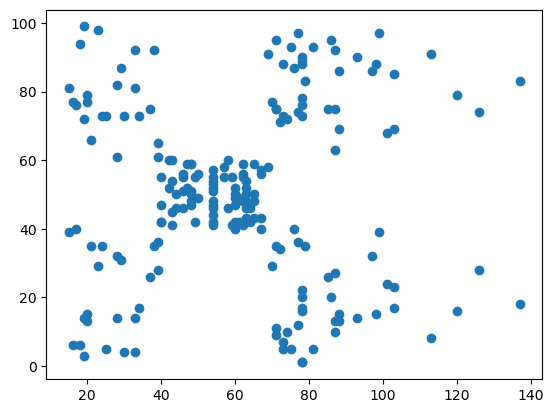

In [60]:
plt.scatter(input.iloc[:,0:1],input.iloc[:,1:])

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct=ColumnTransformer([
    ("Standadrd Scaler",StandardScaler(),[0,1]),
],
                     remainder="passthrough"
                     )

In [62]:
input=ct.fit_transform(input)
input[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [63]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(linkage="complete",n_clusters=5)

In [64]:
y_pred=cluster.fit_predict(input)
y_pred.ravel()

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [65]:
cls=cluster=AgglomerativeClustering(linkage="average",n_clusters=5)
y_pred1=cls.fit_predict(input)
y_pred1.ravel()

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4], dtype=int64)

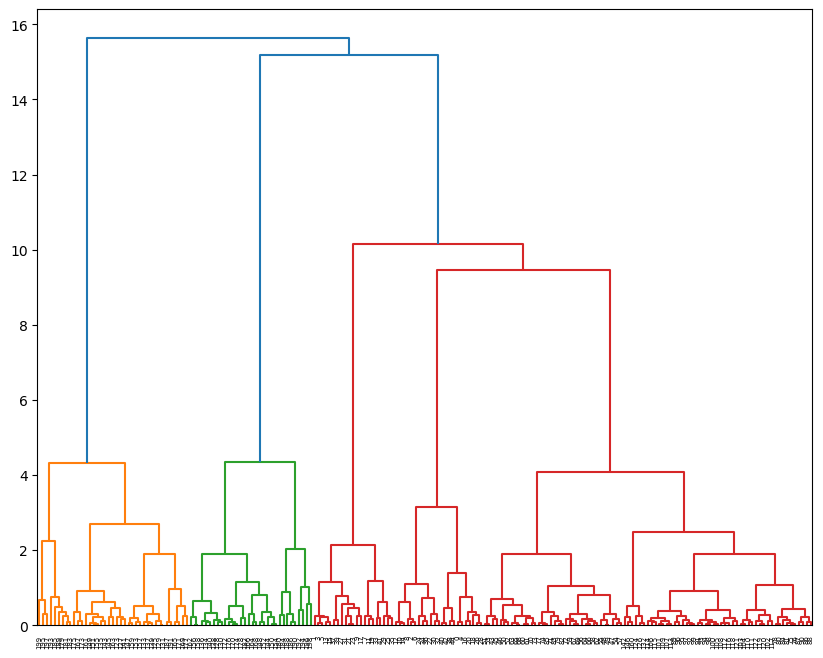

In [66]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=[10,8])
z=sch.linkage(input,method="ward")
dendrogram=sch.dendrogram(z)


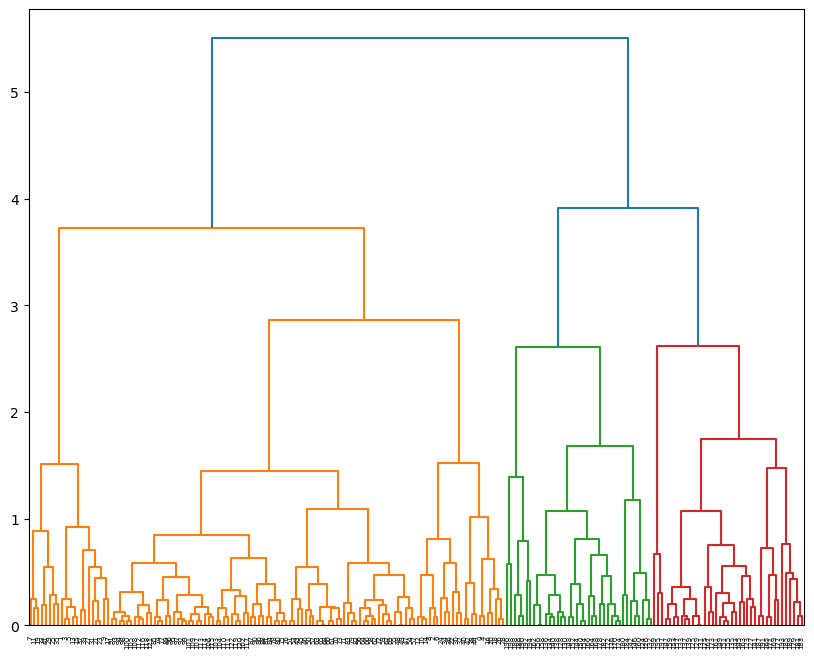

In [67]:
plt.figure(figsize=[10,8])
z=sch.linkage(input,method="complete")
dendrogram=sch.dendrogram(z)